In [1]:
# installing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# pip install sweetviz

                                              0.0/15.1 MB ? eta -:--:--
                                              0.1/15.1 MB 1.7 MB/s eta 0:00:09
     -                                        0.5/15.1 MB 6.0 MB/s eta 0:00:03
     --                                       0.8/15.1 MB 6.0 MB/s eta 0:00:03
     ---                                      1.5/15.1 MB 7.8 MB/s eta 0:00:02
     ----                                     1.9/15.1 MB 8.6 MB/s eta 0:00:02
     ------                                   2.4/15.1 MB 9.2 MB/s eta 0:00:02
     -------                                  2.8/15.1 MB 9.0 MB/s eta 0:00:02
     --------                                 3.4/15.1 MB 9.3 MB/s eta 0:00:02
     ---------                                3.7/15.1 MB 9.0 MB/s eta 0:00:02
     ----------                               3.9/15.1 MB 8.6 MB/s eta 0:00:02
     -----------                              4.3/15.1 MB 8.5 MB/s eta 0:00:02
     ------------                             4.6/15.1 MB 8

### Importing Data

In [2]:
# importing health science data set
data = pd.read_excel('HealthSciences_Dataset.xlsx', sheet_name = 'data')

In [3]:
# displaying first 5 rows of dataset
data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# shape of dataset
data.shape

(101766, 50)

In [5]:
# structure of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
# basic summary of dataset
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [13]:
# converting diag_1 to string
data['diag_1'] = data['diag_1'].astype(str)
data['diag_2'] = data['diag_2'].astype(str)
data['diag_3'] = data['diag_3'].astype(str)

### Sweetviz HTML Report

In [ ]:
# importing sweetviz
import sweetviz as sv
# analyzing the dataset
advert_report = sv.analyze(data)
# generating the report
advert_report.show_html('Diabetes_data.html')

### Exploratory Data Analysis

In [15]:
# unique values for h1A1c result
data['A1Cresult'].value_counts()

A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

In [16]:
# function to check NaN values
def nan_checker(df):
    
    # create a dataframe with variables having NaN, their proportion of NaN and datatype
    df_nan = pd.DataFrame([[var, df[var][df[var] == '?'].count()/ df.shape[0], df[var].dtype]
                           for var in df.columns if df[var][df[var] == '?'].count() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort the datafrane in ascending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

# Use nan_checker on our dataset
df_nan = nan_checker(data)

# Print df_nan
df_nan

,var,proportion,dtype
0,weight,0.968585,object
1,medical_specialty,0.490822,object
2,payer_code,0.395574,object
3,race,0.022336,object
4,diag_3,0.013983,object
5,diag_2,0.003518,object
6,diag_1,0.000206,object


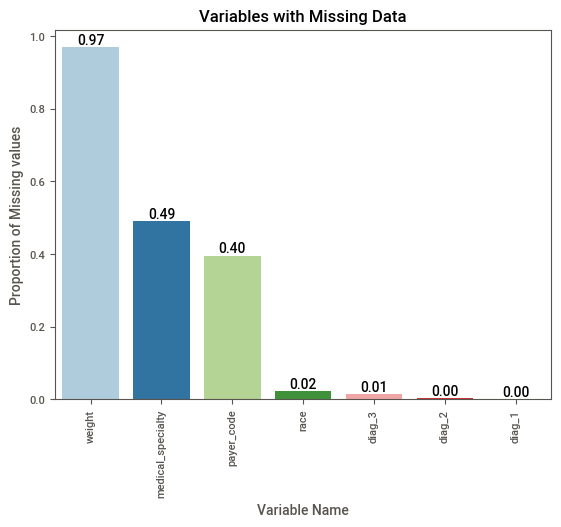

In [22]:
# plotting variables with missing values
sns.set_palette("Paired")
ax = sns.barplot(x = 'var', y = 'proportion', data=df_nan)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax.set_title('Variables with Missing Data')
ax.set(xlabel='Variable Name', ylabel='Proportion of Missing values')
plt.xticks(rotation = 90)
plt.show()

In [23]:
# dropping variables with missing variables and ids except race
data = data.drop(columns=['weight', 'medical_specialty', 'payer_code', 
                      'diag_1', 'diag_2', 'diag_3', 'patient_nbr']).reset_index(drop=True)

In [25]:
# Checking for missing values in remaining columns
for col in data.columns:
    if data[col].dtype == object:
         print(col, data[col][data[col] == '?'].count())

race 2273
gender 0
age 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


### Feature Engineering

In [30]:
# Imputing missing values in race column with NaN

# Unique values in column 'race'
data['race'].unique()
# Replace '?' with 'nan' using replace()
data['race'] = data['race'].replace('?', np.nan)
# Verify the unique values
data['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)